# Projekt 1 - Regresja  (Podstawy uczenia maszynowego)
### Remigiusz Drobinski

W przedsiębiorstwie postanowiono dokonać ewaluacji pracy pewnego urządzenia.
W tym celu zapisywano dane z czujnika w zależności od bieżącego ustawienia urządzenia.
Zebrane dane mają pozwolić ocenić, jak zachowywać się będzie urządzenie,
gdy trafi ono do produkcji i zacznie być wykorzystywane w innych firmach.
Dane te zostały podzielone na zbiór treningowy (plik train_set.csv) i testowy (plik test_set.csv).
W każdym z tych plików pierwsza kolumna zawiera cechę, która ulegała zmianom w trakcie testów,
zaś druga kolumna zawiera parametr urządzenia odczytany w wyniku odpowiedniego ustawienia cechy z pierwszej kolumny.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# region Import and division
train = np.loadtxt('train_set.csv', delimiter=';')  # wczytanie pliku treningowego
test = np.loadtxt('test_set.csv', delimiter=';')  # wczytanie pliku testującego

# Pliki zawierają w sobie dwie kolumny, których wartości odzwierciedlają X oraz Y punktów

trainX = train[:, 0]  # przypisanie zmiennej trainX wartości z pierwszej kolumny z pliku treningowego
trainY = train[:, 1]  # przypisanie zmiennej trainY wartości z drugiej kolumny z pliku treningowego
testX = test[:, 0]  # przypisanie zmiennej testX wartości z pierwszej kolumny z pliku testującego
testY = test[:, 1]  # przypisanie zmiennej testY wartości z drugiej kolumny z pliku testującego
# endregion

In [3]:
# region Functions
def sort_two_lists(list1, list2):  # wczytuje dwie listy, łączy je ze sobą i sortuje po pierwszej wartości
    merged = np.concatenate((list1, list2), axis=1)
    sorted_list = merged[merged[:, 0].argsort()]
    return sorted_list


def polynomial_regression(attributes, degree, values):
    # attributes - wektor cech do treningu (X)
    # degree - stopień wielomianu, którym chcemy dokonywać regresji
    # values - wartości odpowiadające cechom z 'attributes', których model ma się nauczyć (Y)

    # Tworzenie kolejnych potęg cech
    regression = PolynomialFeatures(degree=degree)
    polynomial = regression.fit_transform(attributes)

    # Wyuczenie modelu regresji
    pol_regression = LinearRegression()
    pol_regression.fit(polynomial, values)
    return regression, pol_regression


def prepare_regression(train_x, train_y, test_x, test_y, max_degree):
    # czterech pierwszych atrybutów funkcji raczej nie trzeba tłumaczyć
    # max_degree - maksymalny stopień wielomianu, przy pomocy którego chcemy wykonać regresję
    parameters, test_errors, predictions, distribution_tab = [], [], [], []
    # parameters - współczynniki wielomianów
    # test_errors - wartości błędów na zbiorze testowym
    # predictions - przewidywania
    # distribution_tab - zbiór wartości gęstości rozkładu błędów między wartościami przewidywanymi
    # przez model dla zbioru testowego, a zbiorem testowym

    for j in range(1, max_degree + 1):
        # regresje wielomianami stopnia (1, 2, ..., max_degree)
        poly_model, linear_model = polynomial_regression(train_x, j, train_y)

        parameters.append(linear_model.coef_)  # dodanie parametrów wielomianu j do tablicy

        # Predykcja na zbiorze testowym. Wartości kolejnych potęg dla argumentów
        test_y_prediction = linear_model.predict(poly_model.fit_transform(test_x))
        predictions.append(test_y_prediction)

        # Wyliczenie MSE
        test_errors.append(mean_squared_error(test_y_prediction, test_y))

        # Posortowanie predykcji i zbioru testowego względem argumentów
        sorted_predictions = sort_two_lists(test_x, test_y_prediction)
        sortTest = sort_two_lists(test_x, test_y)

        # Wyliczenie wartości gęstości rozkładu błędów między wartościami przewidywanymi przez model dla zbioru
        # testowego, a zbiorem testowym
        distribution_tab.append(sorted_predictions[:, 1] - sortTest[:, 1])

    return parameters, test_errors, distribution_tab


def PolyCoefficients(x, poly_coefficients):
    # funkcja potrzebna do wyrysowania funkcji wielomianu, przyjmuje jako
    # argumenty tablicę argumentów (X) funkcji oraz tablicę współczynników
    ln = len(poly_coefficients)
    y = 0
    for k in range(ln):
        y += poly_coefficients[k] * x ** k
    return y  # funkcja zwraca tablicę wartości funkcji
# endregion


Zadanie 1:
[GENEROWANIE WYKRESU]


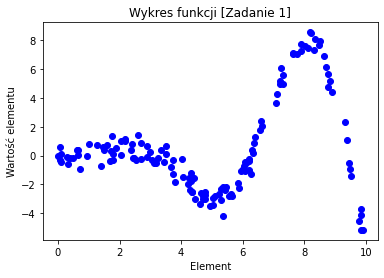

In [4]:
# region Zadanie 1

"""
Wyświetlić wykres punktowy dla danych ze zbioru treningowego.
"""

print("\nZadanie 1:\n[GENEROWANIE WYKRESU]")
plt.figure()
X = np.ravel(trainX)  # ustawienie argumentów
Y = np.ravel(trainY)  # ustawienie wartości dla wcześniej zadanych argumentów
plt.scatter(X, Y, c='blue')  # wykres punktowy (X,Y), ustawienie koloru niebieskiego
plt.title("Wykres funkcji [Zadanie 1]")  # tytuł wykresu
plt.xlabel('Element')  # podpisanie argumentów
plt.ylabel('Wartość elementu')  # podpisanie wartości
plt.show()  # wyświetlenie wykresu
# endregion


Zadanie 2:
[GENEROWANIE WYKRESU]


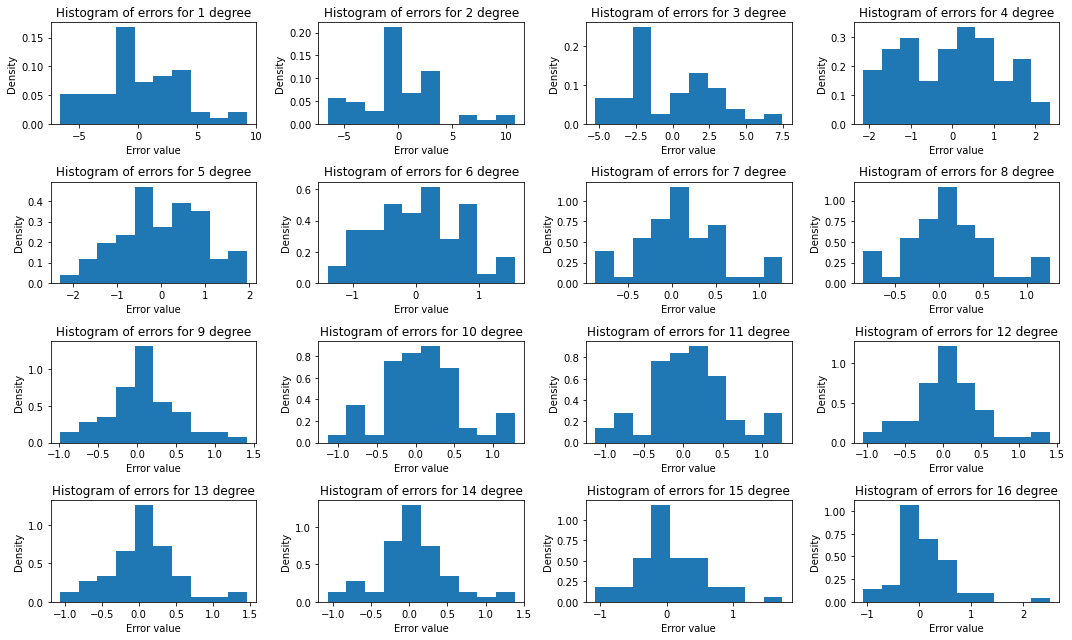

In [5]:
# region Zadanie 2

"""
Wytrenować modele regresji na danych ze zbioru treningowego dla różnych stopni wielomianów. 
Dla każdego modelu naszkicować histogram gęstości rozkładu błędów między wartościami przewidywanymi przez model dla 
zbioru testowego, a zbiorem testowym, tj.:

różnica = predykcja dla zbioru testowego – rzeczywista wartość zbioru testowego
"""

print("\nZadanie 2:\n[GENEROWANIE WYKRESU]")
trainX = trainX.reshape(-1, 1)  # zmiana kształtów tablic
trainY = trainY.reshape(-1, 1)
testX = testX.reshape(-1, 1)
testY = testY.reshape(-1, 1)

Parameters, testErrors, DistTab = prepare_regression(trainX, trainY, testX, testY, 16)
# zmienna Parameters - przechowuje wartości parametrów wielomianów testErrors - przechowuje wartości MSE (błąd
# średniokwadratowy) modeli DistTab - przechowuje wartości do histogramu (gęstość rozkładu błędów między wartościami
# przewidywanymi przez model dla zbioru testowego, a zbiorem testowym)

plt.figure(figsize=(15, 9))  # wielkość rysunku

DistTab = np.array(list(DistTab))  # konwersja listy na tablicę
for i in range(1, 17):  # pętla, która dodaje wykres histogramu na jeden rysunek, liczba histogramów równa się
    # liczbie modeli
    plt.subplot(4, 4, i)  # ustawienie wykresu w odpowiednim miejscu na rysunku-macierzowym 4 na 4
    plt.title('Histogram of errors for {} degree'.format(i))  # tytuł pojedynczego histogramu
    plt.xlabel('Error value')  # podpisanie osi X
    plt.ylabel('Density')  # podpisanie osi Y
    plt.hist(DistTab[i - 1], density=True)  # ilustrowanie pojedynczego histogramu, tworzenie wykresu
plt.tight_layout()  # metoda wspomagająca ilustrowaniu kilku wykresów na jednym rysunku
plt.show()  # pokazanie 16 wykresów histogramu
# endregion

In [7]:
# region Zadanie 3

"""
Wybrać model, dla którego błąd średniokwadratowy (MSE) dla danych ze zbioru testowego jest najmniejszy. 
Dla tak wybranego wielomianu podać jego współczynniki w zaokrągleniu do dwóch miejsc po przecinku.
"""

print("\nZadanie 3:")

minimal = np.amin(testErrors)  # przypisanie zmiennej minimal najmniejszej wartości MSE
min_index = (np.where(testErrors == minimal)[0])  # przypisanie zmiennej indexu, gdzie występuje namniejsze MSE
res = ""

print(f"Błąd średniokwadratowy (MSE) dla danych ze zbioru testowego jest najmniejszy dla wielomianu stopnia:"
      f" {min_index[0] + 1} i wynosi: {minimal}\n")

print("Wielomian przyjmuje postać:\n")

for w in range(1, min_index[0] + 2):
    res += f' + {w}^x*{chr(96 + min_index[0] + 2 - w)}'

print("f(x) = " + res[::-1] + chr(96 + min_index[0] + 2) + "    ,gdzie:\n")
# Współczynniki, z liczbą miejsc po przeciwnku równej dwa
for o in range(0, min_index[0] + 2):
    print("     " + chr(96 + min_index[0] + 2 - o) + " = " + "{0:.2f}".format(Parameters[min_index[0]][0][o]))

# Dla sprawdzenia ukazanie wszystkich wartości MSE
print("\nWartości MSE dla i-tego stopnia wielomianu")
for i in np.arange(len(testErrors)):
    print(f'(i={i+1}      MSE = {testErrors[i]})')
# Jak widać dla wielomianu 9-stopnia błąd jest najmniejszy
# endregion


Zadanie 3:
Błąd średniokwadratowy (MSE) dla danych ze zbioru testowego jest najmniejszy dla wielomianu stopnia: 9 i wynosi: 0.2135427291655316

Wielomian przyjmuje postać:

f(x) = a*x^9 + b*x^8 + c*x^7 + d*x^6 + e*x^5 + f*x^4 + g*x^3 + h*x^2 + i*x^1 + j    ,gdzie:

     j = 0.00
     i = -1.01
     h = 2.84
     g = -3.03
     f = 1.85
     e = -0.66
     d = 0.13
     c = -0.01
     b = 0.00
     a = -0.00

Wartości MSE dla i-tego stopnia wielomianu
(i=1      MSE = 12.090251656588855)
(i=2      MSE = 12.90619430379208)
(i=3      MSE = 8.905226447640889)
(i=4      MSE = 1.3975010083803288)
(i=5      MSE = 0.8861616147612305)
(i=6      MSE = 0.47083569659269586)
(i=7      MSE = 0.24080189697254809)
(i=8      MSE = 0.2392703094162825)
(i=9      MSE = 0.2135427291655316)
(i=10      MSE = 0.23841702496413325)
(i=11      MSE = 0.23990942979595203)
(i=12      MSE = 0.21667158013783158)
(i=13      MSE = 0.21681581402603042)
(i=14      MSE = 0.2228672305820449)
(i=15      MSE = 0.259686933299


Zadanie 4:
[GENEROWANIE WYKRESU]


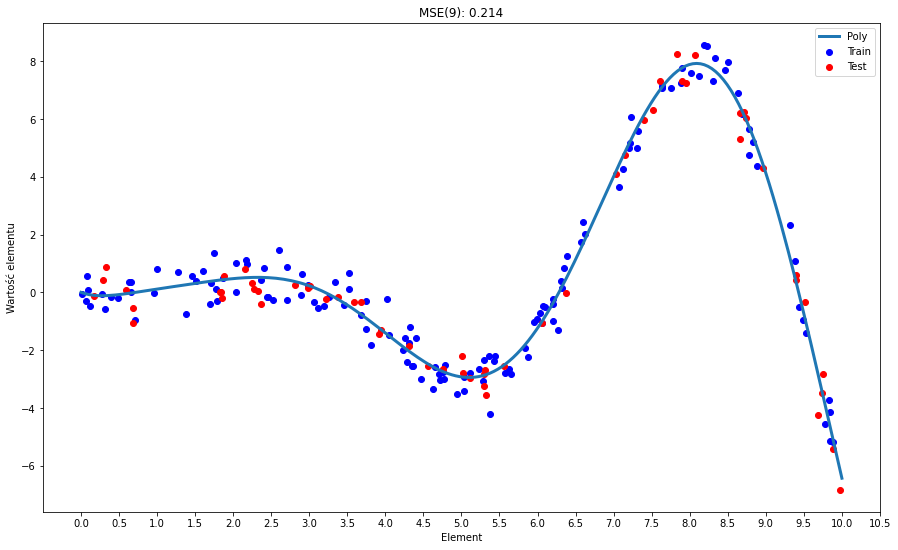

In [8]:
# region Zadanie 4

"""
Zaznaczyć na jednym obrazku wybranym kolorem zbiór treningowy, innym zbiór testowy, 
naszkicować również wykres wielomianu wybranego w poprzednim punkcie. Jako tytuł wykresu wyświetlić 
wartość błędu MSE na zbiorze testowym z zaokrągleniem do trzech miejsc po przecinku. 

Wyświetlić legendę z oznaczeniem kolorów dla poszczególnych punktów oraz wykresu oszacowanej funkcji.
"""

print("\nZadanie 4:\n[GENEROWANIE WYKRESU]")
xTab = np.linspace(0, 10, 200)  # generowanie argumentów (potrzebne do funkcji wielomianu)
coeffs = Parameters[8][0]       # przypisanie zmiennej współczynników funkcji wielomianowej

plt.figure(figsize=(15, 9))  # wielkość rysunku/wykresu
plt.scatter(np.ravel(trainX), np.ravel(trainY), c='blue', label='Train')  # wykres punktowy treningowy
plt.scatter(np.ravel(testX), np.ravel(testY), c='red', label='Test')  # wykres punktowy testowy
plt.plot(xTab, PolyCoefficients(xTab, coeffs), label='Poly', linewidth=3)  # wykres wielomianu
plt.title("MSE({}".format(min_index[0] + 1) + "): {0:.3f}".format(minimal))  # tytuł jako MSE do trzech miejsc po
# przecinku
plt.xlabel('Element')               # podpisanie osi X
plt.ylabel('Wartość elementu')      # podpisanie osi Y
plt.xticks(np.arange(0, 11, 0.5))   # zakres osi X
plt.legend()                        # wyświetlanie legendy
plt.show()                          # zilustrowanie wykresu
# endregion